In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import json

In [2]:
food_access_df=gpd.read_file('../data/Raw Data/NeighborhoodFoodRetail.geojson.json')

In [3]:
food_access_res_df = food_access_df[food_access_df['NON_RESIDENTIAL']== 'No']

In [4]:
food_access_res_df.shape

(1325, 17)

In [5]:
food_access_res_df.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')

#### I have loaded the data and coded out the nonresidential columns (that I had done in a previous notebook). This new data file now only contains areas of Philadelphia that are residential areas

# Preliminary Mapping

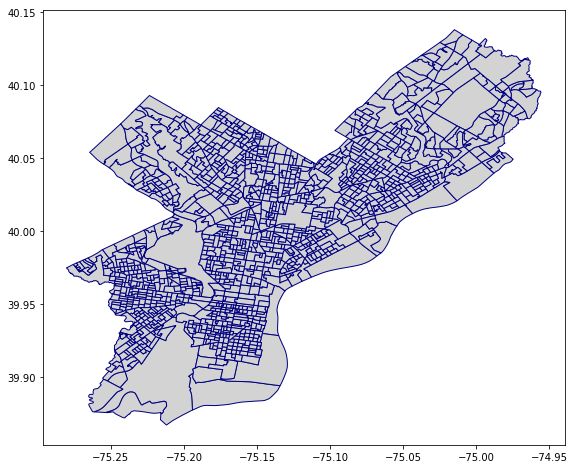

In [6]:
fig1=food_access_df.plot(figsize=(16,8), color='#d3d3d3', edgecolor="#000080")

In [7]:
#This is a map of Phialdelphia, including nonresidential areas.

In [8]:
fig1=fig1.get_figure()

In [9]:
fig1.savefig('Philadelphia.png')

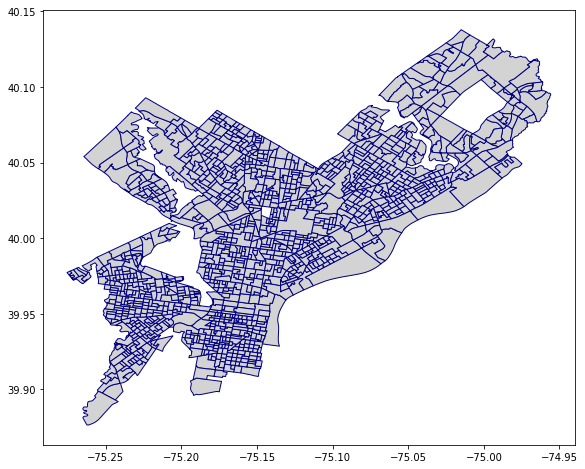

In [10]:
fig2=food_access_res_df.plot(figsize=(16,8), color='#d3d3d3', edgecolor="#000080")

This is what the original map of residential areas in Philadelphia looks like.

In [11]:
fig2=fig2.get_figure()

In [12]:
fig2.savefig('Philadelphia_Residential.png')

# Mapping "HPSS_ACCESS"

In [13]:
food_access_res_df["HPSS_ACCESS"].unique()

array(['Moderate or High Access', 'Low Access', 'No Access'], dtype=object)

In [14]:
food_access_res_df["HPSS_ACCESS"].value_counts(dropna=False)

Moderate or High Access    1139
Low Access                  107
No Access                    79
Name: HPSS_ACCESS, dtype: int64

### My Analysis: 
* Here, I wanted to make sure that there are no "NaN" value counts because it would throw an error on the map plot

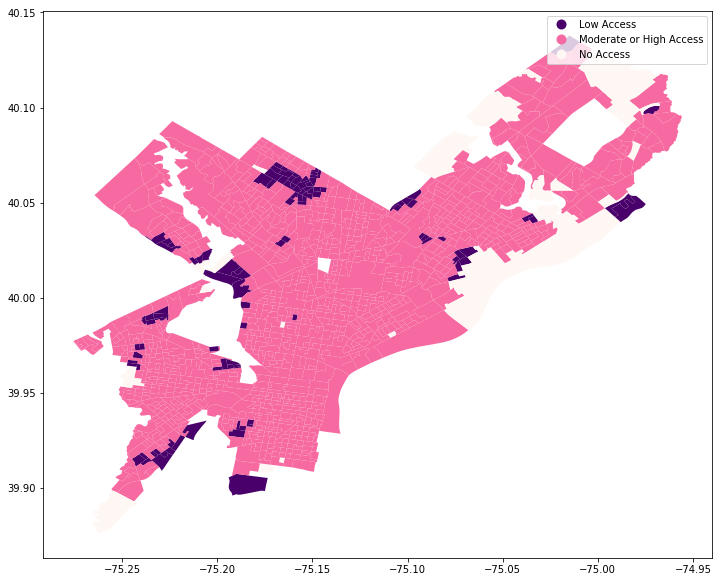

In [15]:
fig3=food_access_res_df.plot(column='HPSS_ACCESS', categorical=True, legend=True, cmap="RdPu_r", figsize=(12, 12))

### My Analysis: 
* In this map, you can see that the areas in dark purple have low access in total to HPSS (high quality produce stores) 
* The pink areas show that the majority of Philadelphia has access to HPSS 
* the areas in very light pink have no access
* I am going to investigate a better color scheme so that it is easier to see all 3 categories

In [16]:
fig3=fig3.get_figure()

In [17]:
fig3.savefig('HPSS_Access.png')

# Mapping "SUPERMARKET_ACCESS"

In [18]:
food_access_res_df["SUPERMARKET_ACCESS"].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
food_access_res_df["SUPERMARKET_ACCESS"].value_counts(dropna=False)

Yes    1052
No      273
Name: SUPERMARKET_ACCESS, dtype: int64

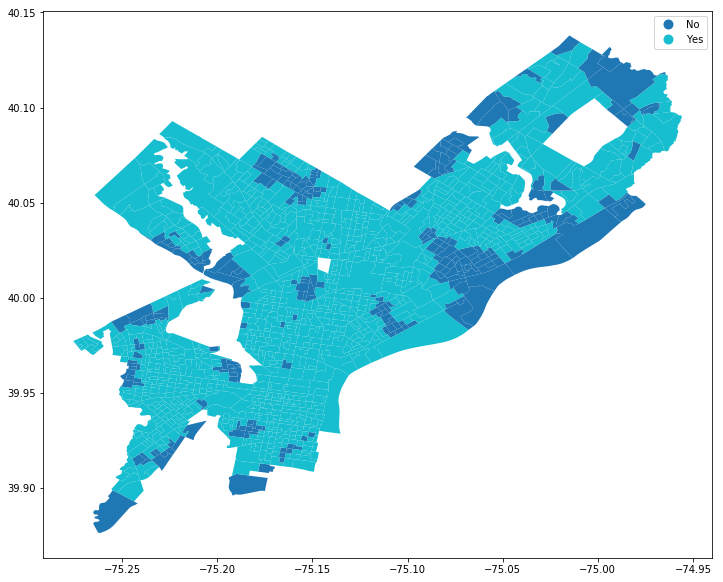

In [20]:
fig4=food_access_res_df.plot(column='SUPERMARKET_ACCESS', categorical=True, legend=True, figsize=(12, 12))

### My Analysis: 
* This map shows that there are areas in Philadelphia that do not have access to supermarkets, compared to the large majority of Philly that does. 
* I am starting to see some overlap between the areas that do not have supermarkets or overall access to HPSS
* something to work on: choosing an aesthetic color binary for the map that shows the differences between yes and no

In [21]:
fig4=fig4.get_figure()

In [22]:
fig4.savefig('Supermarket_Access.png')

# Mapping "HIGH Poverty"

In [23]:
food_access_res_df["HIGH_POVERTY"].unique()

array(['Yes', 'No', None], dtype=object)

In [24]:
food_access_res_df["HIGH_POVERTY"].value_counts(dropna=False)

Yes    740
No     584
NaN      1
Name: HIGH_POVERTY, dtype: int64

There is one "NaN" value so I will need to make sure this is not included in the map because it will throw an error

In [25]:
food_access_res_df2=food_access_res_df[-food_access_res_df["HIGH_POVERTY"].isnull()]

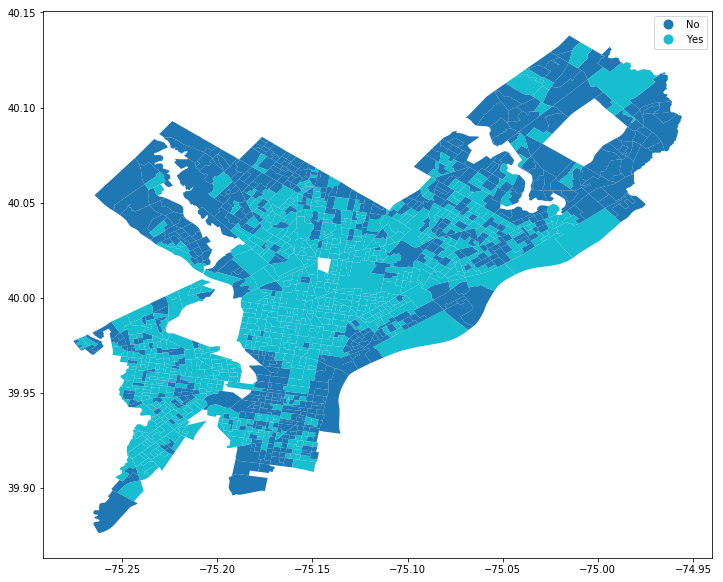

In [26]:
fig5=food_access_res_df2.plot(column="HIGH_POVERTY", categorical=True, legend=True, figsize=(12, 12))

### My Analysis:
* From this map, there are areas in Philadelphia that have high poverty rates

In [27]:
fig5=fig5.get_figure()

In [28]:
fig5.savefig('High_Poverty.png')

# Mapping "TOTAL_LPSS"
* this is a numerical variable

In [29]:
food_access_res_df['TOTAL_LPSS'].unique()

array([ 25.,  21.,   7.,  15.,  17.,  16.,  24.,  32.,  27.,  31.,  29.,
        33.,  36.,  28.,   6.,  34.,  35.,  37.,  26.,  23.,  19.,  10.,
         5.,  13.,   3.,   9.,   2.,  12.,  42.,  50.,  39.,  22.,  20.,
        18.,   8.,  51.,  70.,  49.,  41.,  44.,  43.,  38.,  66.,  69.,
        60.,  61.,  52.,  91.,  55.,  48.,  62.,  71.,  80.,  81.,  76.,
        14.,  11.,  72.,  68.,  53., 120., 125.,  54.,  40.,  45., 123.,
        74.,  57.,  30.,  67.,  63.,  90.,  78.,  58., 133.,  98.,  79.,
        47.,  59.,  46.,  56.,  89.,  64.,   4.,  83.,  82.,  88.,  75.,
         0.,  73.,  86.,  77.,  93., 140.,  65.,   1.,  87., 148.])

By looking at the variable values, it is clear that it is a numerical variable. There is no "NaN" so it will not throw an error.

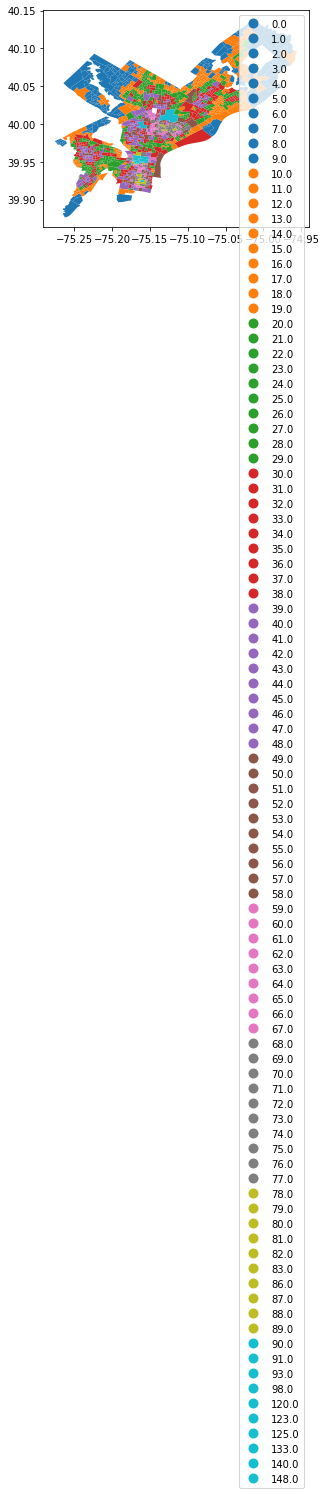

In [30]:
food_access_res_df.plot(column='TOTAL_LPSS', categorical=True, legend=True)

This map is very difficult to understand as it has a variety of colors and each value in the legend is listed as its own point. I need to collapse these values into categories. 

## Grouping the 'TOTAL_LPSS' Category:
I am going to create a new column called "Total_LPSS_Cat" that puts the numerical values into string categories such as 0-10, 11-20, 20-30, etc. 


In [31]:
food_access_res_df['TOTAL_LPSS'].describe()

count    1325.000000
mean       29.661132
std        19.908910
min         0.000000
25%        16.000000
50%        27.000000
75%        39.000000
max       148.000000
Name: TOTAL_LPSS, dtype: float64

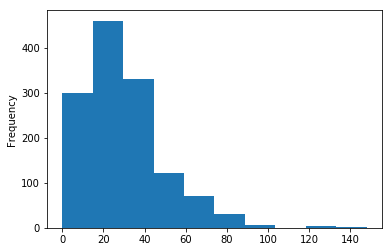

In [32]:
food_access_res_df['TOTAL_LPSS'].plot(kind='hist')

### My Analysis:
From the histogram and describe function, I am able to see the distribution of values in the 'Total_LPSS' column. Bins are the values that serve as the "end/separators" for each new category. I know that my first bin must be set at 0 as the minimum value is 0 and my last bin must be greater than 148 as that is the maximum value. For simplicity, I want to make my categories in increments of 10, so I will set my bins every 10 to contain the values.

In [33]:
bins=[0,10,20,30,40,50,60,70,80, 90, 150]
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 150]

I now need to define the labels I want to use for the new category. I have written a for loop that creates the range of each label.

In [34]:
labels=['{: >2}-<{}'.format(i+1,i+11) for i in range(-1,89,10)]
labels.append('90+')
labels

[' 0-<10',
 '10-<20',
 '20-<30',
 '30-<40',
 '40-<50',
 '50-<60',
 '60-<70',
 '70-<80',
 '80-<90',
 '90+']

In [35]:
pd.cut(food_access_res_df['TOTAL_LPSS'], bins=bins, 
       labels=labels,
       include_lowest=True,
       right=False).head(20)

0     20-<30
1     20-<30
2      0-<10
3     10-<20
4     10-<20
5     10-<20
6     20-<30
7     30-<40
8     20-<30
9     30-<40
10    20-<30
11    20-<30
12    30-<40
13    30-<40
14    30-<40
15    30-<40
16    30-<40
17    20-<30
18     0-<10
19    20-<30
Name: TOTAL_LPSS, dtype: category
Categories (10, object): [0-<10 < 10-<20 < 20-<30 < 30-<40 ... 60-<70 < 70-<80 < 80-<90 < 90+]

The code above essentially matches the values in the 'Total_LPSS' column with categories in the 'TOTAL_LPSS_Cat' column.

In [36]:
food_access_res_df['TOTAL_LPSS_Cat']= pd.cut(food_access_res_df['TOTAL_LPSS'], bins=bins, 
                                       labels=labels,
                                       include_lowest=True,
                                       right=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
food_access_res_df[['TOTAL_LPSS','TOTAL_LPSS_Cat']].head(20)

,TOTAL_LPSS,TOTAL_LPSS_Cat
0,25.0,20-<30
1,21.0,20-<30
2,7.0,0-<10
3,15.0,10-<20
4,17.0,10-<20
5,16.0,10-<20
6,24.0,20-<30
7,32.0,30-<40
8,27.0,20-<30
9,31.0,30-<40


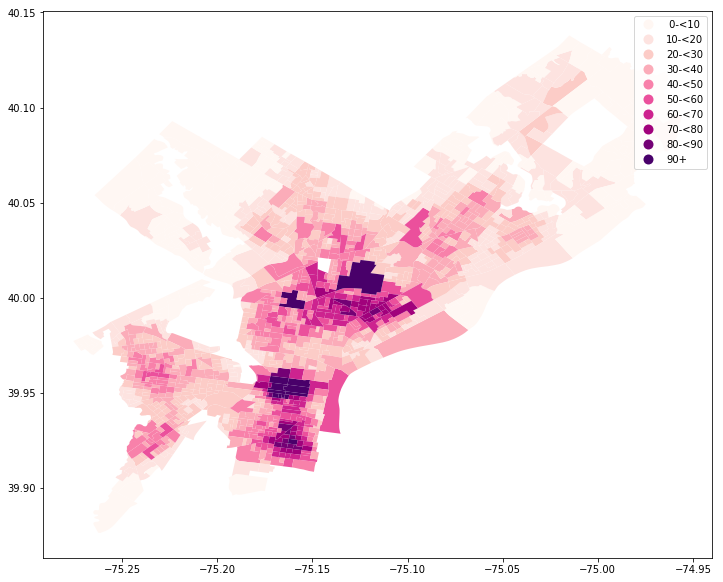

In [38]:
fig6=food_access_res_df.plot(column='TOTAL_LPSS_Cat', 
                             categorical=True, 
                             legend=True, cmap="RdPu", figsize=(12, 12))

In [39]:
fig6=fig6.get_figure()

In [40]:
fig6.savefig('Total LPSS Categories.png')

## Grouping the LPSS_Per1000 Category:
I am going to create a new column called "LPSS_Per1000_Cat" that puts the numerical values into string categories such as 0-10, 11-20, 20-30, etc. 

In [41]:
food_access_res_df['LPSS_PER1000'].describe()

count    1325.000000
mean       31.087562
std        25.752759
min         0.000000
25%        13.045099
50%        24.469821
75%        41.792853
max       224.615385
Name: LPSS_PER1000, dtype: float64

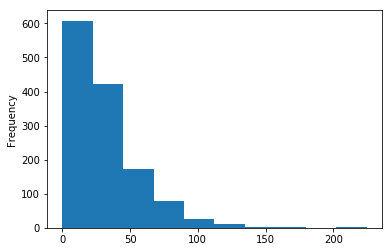

In [42]:
food_access_res_df['LPSS_PER1000'].plot(kind='hist')

### My Analysis:
From the histogram and describe function, I am able to see the distribution of values in the 'LPSS_PER100' column. Bins are the values that serve as the "end/separators" for each new category. I know that my first bin must be set at 0 as the minimum value is 0 and my last bin must be greater than 225 as that is the maximum value. For simplicity, I want to make my categories in increments of 10, so I will set my bins every 10 to contain the values. I will follow the same method to collapse the 'Total_LPSS' column. 

From the above histogram, you can see that the distribution of LPSS changes when controlled for population. This distribution shows that there are that have a high amount of lower quality produce stores (200s) when controlled for population differences. 

In [43]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190, 200,225]
bins

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 225]

In [44]:
labels=['{: >9}-<{}'.format(i+1,i+11) for i in range(-1,190,10)]
labels.append('200+')
labels

['        0-<10',
 '       10-<20',
 '       20-<30',
 '       30-<40',
 '       40-<50',
 '       50-<60',
 '       60-<70',
 '       70-<80',
 '       80-<90',
 '       90-<100',
 '      100-<110',
 '      110-<120',
 '      120-<130',
 '      130-<140',
 '      140-<150',
 '      150-<160',
 '      160-<170',
 '      170-<180',
 '      180-<190',
 '      190-<200',
 '200+']

In [45]:
pd.cut(food_access_res_df['LPSS_PER1000'], bins=bins, 
       labels=labels,
       include_lowest=True,
       right=False).head(20)

0             30-<40
1             20-<30
2             10-<20
3             10-<20
4             20-<30
5             10-<20
6             20-<30
7            90-<100
8             50-<60
9             50-<60
10            30-<40
11            20-<30
12            30-<40
13            50-<60
14            80-<90
15            20-<30
16            40-<50
17            10-<20
18             0-<10
19            20-<30
Name: LPSS_PER1000, dtype: category
Categories (21, object): [0-<10 < 10-<20 < 20-<30 < 30-<40 ... 170-<180 < 180-<190 < 190-<200 < 200+]

In [46]:
food_access_res_df['LPSS_PER1000_cat']= pd.cut(food_access_res_df['LPSS_PER1000'], bins=bins, 
                                       labels=labels,
                                       include_lowest=True,
                                       right=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [47]:
food_access_res_df[['LPSS_PER1000','LPSS_PER1000_cat']].head(20)

,LPSS_PER1000,LPSS_PER1000_cat
0,30.674847,30-<40
1,28.806584,20-<30
2,17.114914,10-<20
3,19.480519,10-<20
4,25.914634,20-<30
5,16.931217,10-<20
6,27.272727,20-<30
7,93.023256,90-<100
8,51.039698,50-<60
9,55.956679,50-<60


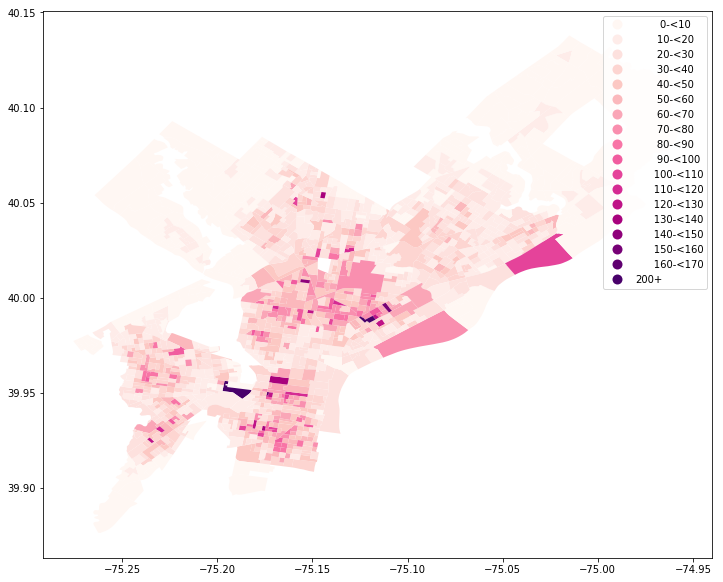

In [48]:
food_access_res_df.plot(column='LPSS_PER1000_cat', categorical=True, legend=True, cmap="RdPu", figsize=(12, 12))

### My Analysis: 
This map originally was flawed because it listed the categories in alphabetical order, not in numerical order. Because they are string objects, Python does not recognize them as numerical categories. Thus, the heat map showed areas with 90-100 as the darkest color, where as 200+ is in a medium pink. 

However, then I changed my code above when I defined the labels by adding a space before all of them besides the 90-100 label by adding the code '{: >9}-<{}' to the label definitions. Now, the legend is in the correct order and the map looks the same as below ('LPSS_Per1000' without the categories collapsed). Either can be used. 

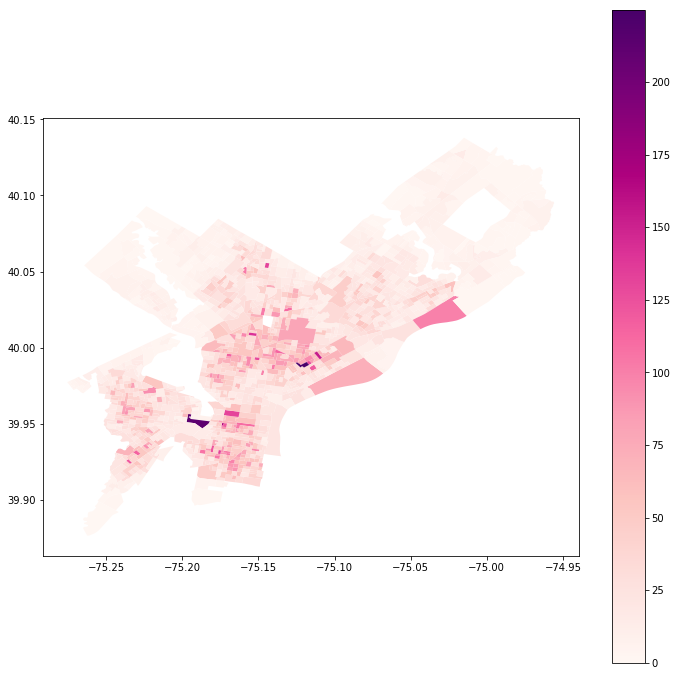

In [49]:
fig7=food_access_res_df.plot(column='LPSS_PER1000', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

In [50]:
fig7=fig7.get_figure()

In [51]:
fig7.savefig('LPSS PER 1000.png')

### My Analysis: 
Instead, I mapped the original "LPSS per 1000" column with a color bar to show the changes in access to low quality produce stores. I made sure that in my code to change "categorical=False" in the plot code. This map is far different than "Total LPSS" and shows that there are 2 pockets in dark purple with very high access to lower quality produce store , and several small darker pink areas with high access to LPSS.  

# Mapping the 'TOTAL_HPSS'

In [52]:
food_access_res_df['TOTAL_HPSS'].describe()

count    1325.000000
mean        3.787736
std         4.542649
min         0.000000
25%         1.250000
50%         2.750000
75%         4.250000
max        32.000000
Name: TOTAL_HPSS, dtype: float64

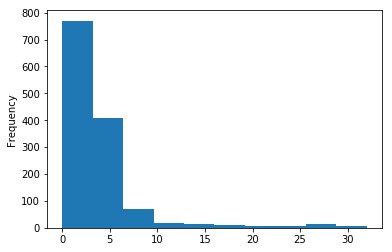

In [53]:
food_access_res_df['TOTAL_HPSS'].plot(kind='hist')

### My Analysis:
From the histogram and describe function, I am able to see the distribution of values in the 'TOTAL_HPSS' column. I know that my first bin must be set at 0 as the minimum value is 0 and my last bin must be greater than 32 as that is the maximum value. For simplicity, I want to make my categories in increments of 5, so I will set my bins every 5 to contain the values.

In [54]:
bins=[0,5,10,15,20,25,30,35,]
bins

[0, 5, 10, 15, 20, 25, 30, 35]

In [55]:
labels=['{: >2}-{}'.format(i+1,i+5) for i in range(-1,25,5)]
labels.append('30+')
labels

[' 0-4', ' 5-9', '10-14', '15-19', '20-24', '25-29', '30+']

In [56]:
pd.cut(food_access_res_df['TOTAL_HPSS'], bins=bins, 
       labels=labels,
       include_lowest=True,
       right=False).head(20)

0      0-4
1      0-4
2      0-4
3      0-4
4      0-4
5      0-4
6      0-4
7      0-4
8      0-4
9      5-9
10     0-4
11     0-4
12     0-4
13     0-4
14     0-4
15     0-4
16     0-4
17     0-4
18     0-4
19     5-9
Name: TOTAL_HPSS, dtype: category
Categories (7, object): [0-4 < 5-9 < 10-14 < 15-19 < 20-24 < 25-29 < 30+]

In [57]:
food_access_res_df['TOTAL_HPSS_cat']= pd.cut(food_access_res_df['TOTAL_HPSS'], bins=bins, 
                                       labels=labels,
                                       include_lowest=True,
                                       right=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


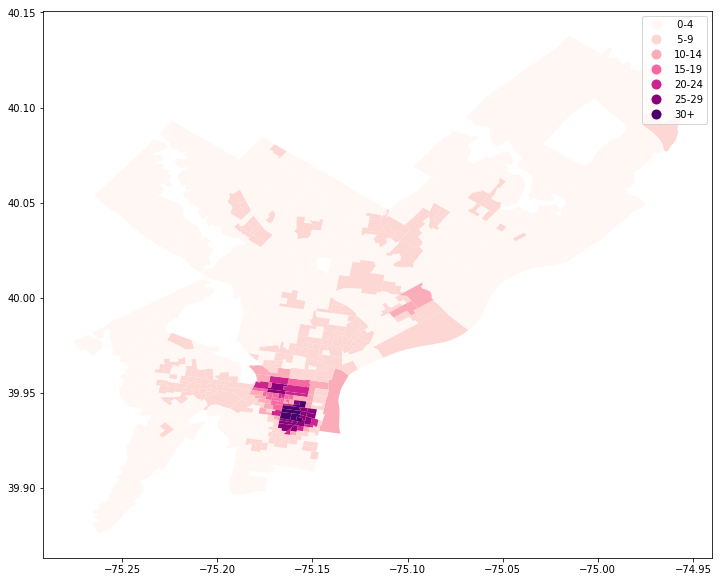

In [58]:
food_access_res_df.plot(column='TOTAL_HPSS_cat', categorical=True, legend=True, cmap="RdPu",figsize=(12, 12))


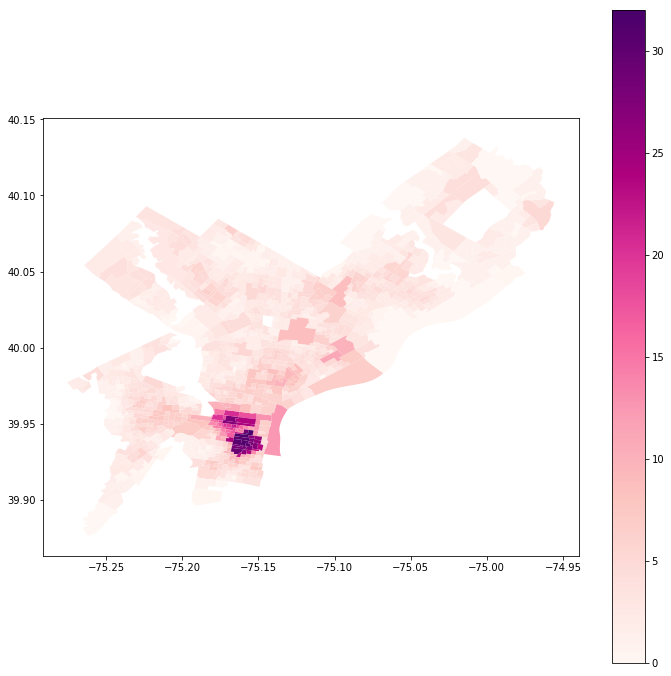

In [59]:
fig8=food_access_res_df.plot(column='TOTAL_HPSS', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

In [60]:
fig8=fig8.get_figure()

In [61]:
fig8.savefig('Total HPSS.png')

### My Analysis 
Again, the alphabetical order of the variables in the map posed a problem. The bottom map is the correct mapping of the way HPSS is accessed in Philadelphia. Additionally, the above map with collapsed categories is also correct because spaces were added to the first two legends. 

# Mapping the 'HPSS_PER1000'

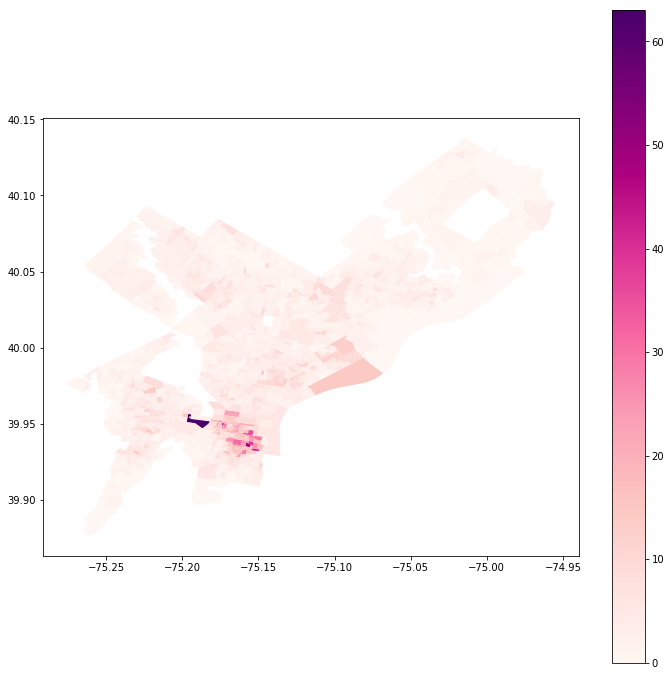

In [62]:
fig9= food_access_res_df.plot(column='HPSS_PER1000', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

### My Analysis: 
* because the maps "HPSS_PER1000" and one with collapsed categories will look the same, I elected to just do the one map with HPSS_PER1000 considered a numerical variable. Therefore, the code for the map says (categorical=False). 

In [63]:
fig9=fig9.get_figure()

In [64]:
fig9.savefig("HPSS_Per1000.png")

# Investigating 'PCT_VEHICLE_AVAILABILITY':

In [65]:
food_access_res_df['PCT_VEHICLE_AVAILABILITY'].unique()

array([44.2687747 , 67.61133603, 37.35632184, ..., 83.83233533,
       59.94318182, 70.27027027])

In [66]:
food_access_res_df['PCT_VEHICLE_AVAILABILITY'].isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1306    False
1307    False
1308    False
1309    False
1310    False
1311    False
1312    False
1313    False
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323    False
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
Name: PCT_VEHICLE_AVAILABILITY, Length: 1325, dtype: bool

In [67]:
food_access_res_df['PCT_VEHICLE_AVAILABILITY']== "none"


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1306    False
1307    False
1308    False
1309    False
1310    False
1311    False
1312    False
1313    False
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323    False
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
Name: PCT_VEHICLE_AVAILABILITY, Length: 1325, dtype: bool

Originally, my map threw an error. I have a suspicion that it is because there are null values because there are overall 1325 rows in the data set, but only 1323 in the "count" in the describe function. I am going to code them out and see if it fixes the error. 

In [68]:
#food_access_res_df['PCT_VEHICLE_AVAILABILITY'].value_counts(dropna=False)

In [69]:
food_access_res_df['PCT_VEHICLE_AVAILABILITY'].describe()


count    1323.000000
mean       67.996425
std        20.016295
min         0.000000
25%        53.694266
50%        69.856459
75%        84.330495
max       100.000000
Name: PCT_VEHICLE_AVAILABILITY, dtype: float64

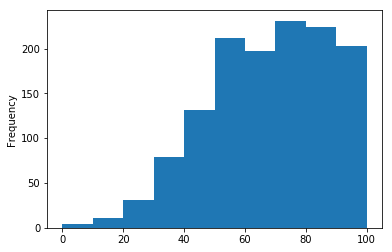

In [70]:
food_access_res_df['PCT_VEHICLE_AVAILABILITY'].plot(kind='hist')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


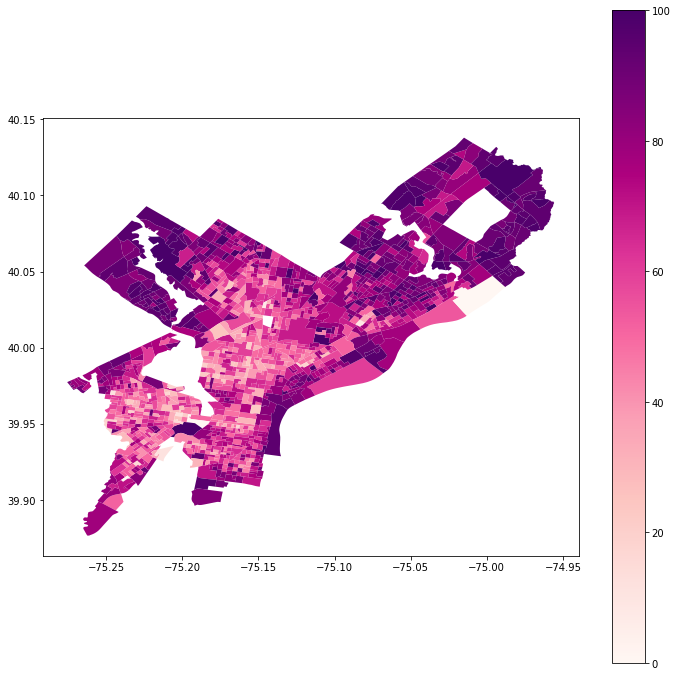

In [71]:
fig10=food_access_res_df.plot(column='PCT_VEHICLE_AVAILABILITY', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

In [72]:
fig10=fig10.get_figure()

In [73]:
fig10.savefig("Vehicle Availability.png")

### My Analysis:
This map is a plot of the numerical data available to describe the percentage of people who have a care available to them in a given area. It seems like the lighter areas are more concentrated in the center of the city, while the periphery areas are darker (have more car access). I am going to collapse the variable to see if it simplifies the map

In [74]:
bins=[0,10,20,30,40,50,60,70,80,90, 100, 110]
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [75]:
labels=['{}-{}'.format(i+1,i+11) for i in range(-1,90,10)]
labels.append('100+')
labels

['0-10',
 '10-20',
 '20-30',
 '30-40',
 '40-50',
 '50-60',
 '60-70',
 '70-80',
 '80-90',
 '90-100',
 '100+']

In [76]:
pd.cut(food_access_res_df['PCT_VEHICLE_AVAILABILITY'], bins=bins, 
       labels=labels,
       include_lowest=True,
       right=False).head(20)

0      40-50
1      60-70
2      30-40
3      50-60
4      70-80
5      10-20
6      30-40
7      60-70
8      50-60
9      80-90
10     50-60
11     70-80
12     60-70
13    90-100
14     50-60
15     60-70
16     50-60
17     60-70
18     70-80
19     80-90
Name: PCT_VEHICLE_AVAILABILITY, dtype: category
Categories (11, object): [0-10 < 10-20 < 20-30 < 30-40 ... 70-80 < 80-90 < 90-100 < 100+]

In [77]:
food_access_res_df['PCT_VEHICLE_AVAILABILITY_Cat']= pd.cut(food_access_res_df['PCT_VEHICLE_AVAILABILITY'], bins=bins, 
                                       labels=labels,
                                       include_lowest=True,
                                       right=False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [78]:
food_access_res_df[['PCT_VEHICLE_AVAILABILITY','PCT_VEHICLE_AVAILABILITY_Cat']].tail(15)

,PCT_VEHICLE_AVAILABILITY,PCT_VEHICLE_AVAILABILITY_Cat
1321,17.500000,10-20
1322,25.806452,20-30
1323,64.285714,60-70
1324,46.223565,40-50
1325,79.696970,70-80
1326,66.285714,60-70
1327,76.677316,70-80
1328,86.206897,80-90
1329,81.250000,80-90
1330,96.750903,90-100


In [79]:
#food_access_res_df.plot(column='PCT_VEHICLE_AVAILABILITY_Cat', categorical=True,  figsize=(12, 12))

### My Analysis: 
I am not totally sure why this map keeps throwing an error. I have a suspicion that it is because there is one row in the column that is coded "NAN." I have tried to code it out several different ways, but it continues to throw an error 

# Mapping 'PCT_POVERTY':

In [80]:
food_access_res_df['PCT_POVERTY'].describe()

count    1324.000000
mean       26.558562
std        18.833939
min         0.000000
25%        11.045687
50%        22.929240
75%        39.332220
max        92.452830
Name: PCT_POVERTY, dtype: float64

In [81]:
food_access_res_df['PCT_POVERTY'].isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1306    False
1307    False
1308    False
1309    False
1310    False
1311    False
1312    False
1313    False
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323    False
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
Name: PCT_POVERTY, Length: 1325, dtype: bool

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


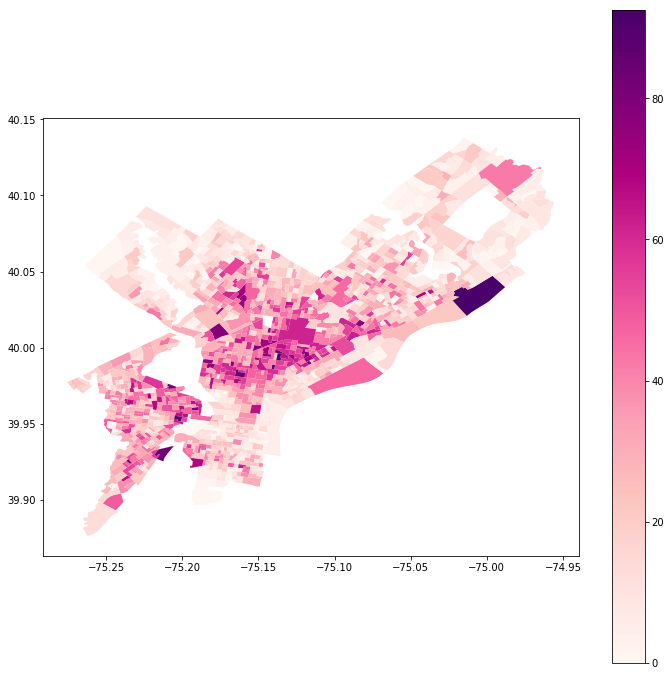

In [82]:
fig11=food_access_res_df.plot(column='PCT_POVERTY', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

### My Analysis: 
The map above shows poverty rates across Philadelphia. There are some areas in Philadelphia in very light pink that have a low poverty rate (below 20). However, there are a good amount of pockets with much darker pink/purple. Additionally, along the river there are large patches of darker pink and deep purple showing that there is high poverty there. 

In [83]:
fig11=fig11.get_figure()

In [84]:
fig11.savefig("Poverty Rates.png")

# Mapping 'TOTAL_RESTAURANTS':

In [85]:
food_access_res_df['TOTAL_RESTAURANTS'].describe()

count    1325.000000
mean        4.760755
std        11.162666
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       174.000000
Name: TOTAL_RESTAURANTS, dtype: float64

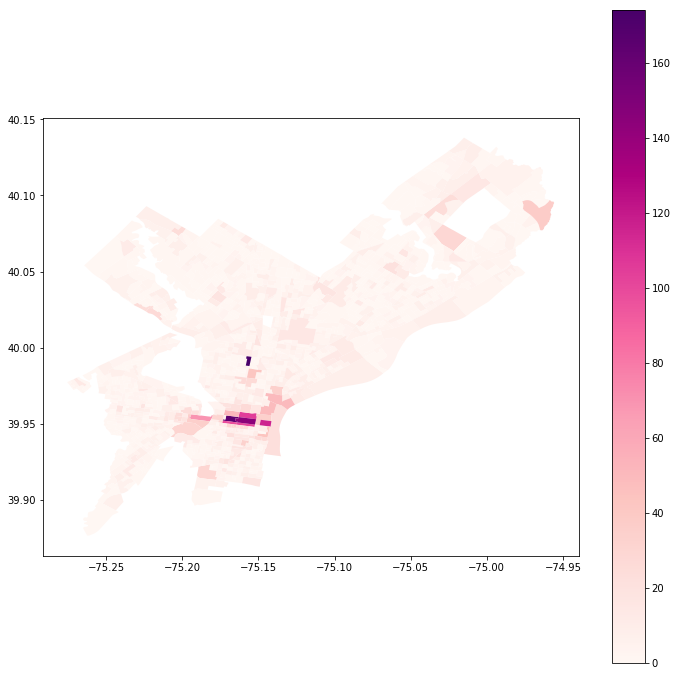

In [86]:
fig12=food_access_res_df.plot(column='TOTAL_RESTAURANTS', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

In [87]:
fig12=fig12.get_figure()

In [88]:
fig12.savefig("Total Restaurants.png")

### My Analysis: 
There is one area of Philadelphia that seems to have a high concentration of restaurants. This seems correlated with the area that has the lowest poverty rates in the cities. Additionally, there seems to be one section in dark purple that also has a lot of restaurants.

# Understanding the Relationship between Healthy and Non-Heathy stores: 
I want to locate the pockets in Philadelphia where non-healthy food stores (LPSS) outweigh healthy food stores (HPSS). From a previous analysis (in the Notebook called 'Finding Associations') I found that there is a relationship between healthy and nonhealthy food stores: LPSS increases with an increase in HPSS. Essentially, the more of one type of store predicts that there will be more of the other. 

Thus, I wanted to see if there were areas in Philly that lower quality (or higher quality) choices outweigh other options. I will set up a ratio of High Quality over Total Access (LPSS + HPSS) and plot the map.

In [89]:
food_access_res_df['ratio']=food_access_res_df['TOTAL_HPSS']/(food_access_res_df['TOTAL_LPSS']+food_access_res_df['TOTAL_HPSS'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### My Analysis: 
I created a new column called ratio that is the number of HPSS divided by LPSS + HPSS (which I am assuming is the total amount of grocery stores in the area).

In [90]:
food_access_res_df['ratio']

0       0.090909
1       0.076923
2       0.066667
3       0.154930
4       0.128205
5       0.146667
6       0.135135
7       0.129252
8       0.107438
9       0.138889
10      0.127820
11      0.130435
12      0.120567
13      0.089655
14      0.101449
15      0.076923
16      0.070423
17      0.066667
18      0.384615
19      0.147059
20      0.068966
21      0.123288
22      0.055556
23      0.102564
24      0.051282
25      0.041322
26      0.081081
27      0.056180
28      0.072000
29      0.068493
          ...   
1306    0.250000
1307         NaN
1308    0.090909
1309    0.000000
1310    0.000000
1311    0.125000
1312    0.000000
1313    0.063830
1314    0.070270
1315    0.185841
1316    0.217391
1317    0.229358
1318    0.207547
1319    0.124378
1320    0.132075
1321    0.095652
1322    0.106796
1323    0.040000
1324    0.070707
1325    0.076923
1326    0.288889
1327    0.257143
1328    0.084746
1329    0.137255
1330    0.000000
1331    0.164835
1332    0.208791
1333    0.0291

In [91]:
food_access_res_df.tail(10)

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,...,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geometry,TOTAL_LPSS_Cat,LPSS_PER1000_cat,TOTAL_HPSS_cat,PCT_VEHICLE_AVAILABILITY_Cat,ratio
1326,1327,421010263012,No,8.0,8.898776,3.25,3.615128,28.888889,Moderate or High Access,Yes,...,13.904338,No,144044.503906,1561.974025,"POLYGON ((-75.16128677814601 40.075772089611, ...",0-<10,0-<10,0-4,60-70,0.288889
1327,1328,421010263013,No,13.0,13.443640,4.50,4.653568,25.714286,Moderate or High Access,Yes,...,15.201655,No,190466.781250,1783.965219,"POLYGON ((-75.16179077749921 40.0752390897802,...",10-<20,10-<20,0-4,70-80,0.257143
1328,1329,421010263022,No,27.0,18.108652,2.50,1.676727,8.474576,Moderate or High Access,Yes,...,8.182428,No,314215.023438,2692.645155,"POLYGON ((-75.15428777520449 40.067364088301, ...",20-<30,10-<20,0-4,80-90,0.084746
1329,1330,421010263021,No,22.0,13.118664,3.50,2.087060,13.725490,Moderate or High Access,Yes,...,15.563506,No,237185.625000,1962.137255,"POLYGON ((-75.1531527746782 40.0675620887417, ...",20-<30,10-<20,0-4,80-90,0.137255
1330,1331,421010348012,No,12.0,8.746356,0.00,0.000000,0.000000,No Access,No,...,2.113703,No,670624.167969,3800.844947,"POLYGON ((-75.0211867325235 40.0616990921761, ...",10-<20,0-<10,0-4,90-100,0.000000
1331,1332,421010263023,No,19.0,24.547804,3.75,4.844961,16.483516,Moderate or High Access,Yes,...,9.948320,No,245228.175781,2060.622107,"POLYGON ((-75.15868377615431 40.0665620881537,...",10-<20,20-<30,0-4,60-70,0.164835
1332,1333,421010263024,No,18.0,8.628955,4.75,2.277085,20.879121,Moderate or High Access,Yes,...,9.779482,No,407054.953125,2563.501420,"POLYGON ((-75.15524277606011 40.0704490893932,...",10-<20,0-<10,0-4,80-90,0.208791
1333,1334,421010264001,No,25.0,33.377837,0.75,1.001335,2.912621,Low Access,No,...,16.688919,No,238290.523438,2082.139993,"POLYGON ((-75.1609847764414 40.0606620863864, ...",20-<30,30-<40,0-4,50-60,0.029126
1334,1335,421010264006,No,17.0,34.136546,1.00,2.008032,5.555556,Low Access,No,...,0.000000,No,315044.523438,2451.963882,"POLYGON ((-75.1606897772335 40.0644760878932, ...",10-<20,30-<40,0-4,70-80,0.055556
1335,1336,421010264007,No,22.0,48.034934,1.00,2.183406,4.347826,Low Access,No,...,14.410480,No,129360.875000,2102.187074,"POLYGON ((-75.1593277768072 40.0636970873872, ...",20-<30,40-<50,0-4,100+,0.043478


/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


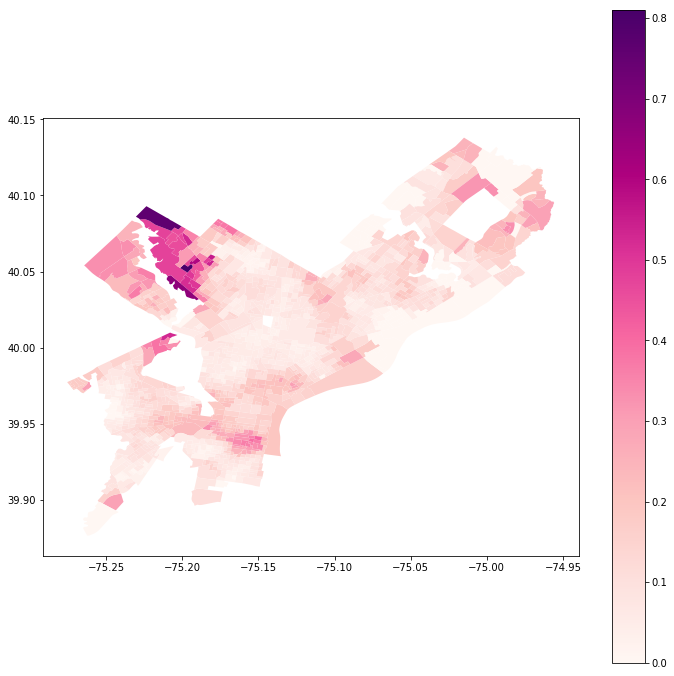

In [92]:
fig13=food_access_res_df.plot(column='ratio', categorical=False, legend=True, cmap="RdPu", figsize=(12, 12))

### My Analysis: 
This map is the plot of the ratio of high quality stores to overall food stores. It is clear that an area in center city(ish) and up in the north in Chestnut Hill (ish) have the highest ratio. This means that there are more high quality produce food stores than low quality produce stores in these areas. 

In [93]:
fig13=fig13.get_figure()

In [94]:
fig13.savefig("Ratio of HPSS to Total.png")

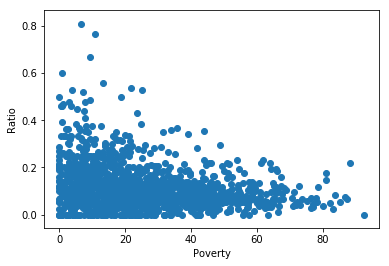

In [95]:
x=food_access_res_df['PCT_POVERTY']
y=food_access_res_df['ratio']

plt.xlabel('Poverty')
plt.ylabel('Ratio')

plt.scatter(x, y)

### My Analysis: 
I did a scatter plot of the ratio between poverty and the ratio of HPSS to Total. Here you can see that a higher percentage of healthy foods only occurs when the poverty rate is lower. The ratio is far lower for areas of higher poverty

In [96]:
food_access_res_df['ratio_per100']=food_access_res_df['HPSS_PER1000']/(food_access_res_df['LPSS_PER1000']+food_access_res_df['HPSS_PER1000'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
food_access_res_df[['ratio','ratio_per100']].head(20)

,ratio,ratio_per100
0,0.090909,0.090909
1,0.076923,0.076923
2,0.066667,0.066667
3,0.154930,0.154930
4,0.128205,0.128205
5,0.146667,0.146667
6,0.135135,0.135135
7,0.129252,0.129252
8,0.107438,0.107438
9,0.138889,0.138889


### My Analysis: 
I assumed that the ratio value would be the same if done with LPSS_Per1000 and HPSS_PER100) (both controlled for population) but I wanted to confirm. They are the same.